## Importing the Libraries

In [ ]:
!pip install gdown -q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import spacy
import string


In [ ]:
# to run it : shift + enter
import gdown

train_url = 'https://drive.google.com/uc?id=1n5AzFNAITP7afbLHxpENaPuXL0skv6bX'
test_url = 'https://drive.google.com/uc?id=1hlo6KlbDGT2bj6wzQDvF7JGwA9nLJeKF'


gdown.download(train_url, "twitter_training.csv", quiet=False)
gdown.download(test_url,"twitter_validation.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1n5AzFNAITP7afbLHxpENaPuXL0skv6bX
To: /content/twitter_training.csv
100%|██████████| 10.3M/10.3M [00:00<00:00, 24.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hlo6KlbDGT2bj6wzQDvF7JGwA9nLJeKF
To: /content/twitter_validation.csv
100%|██████████| 164k/164k [00:00<00:00, 38.3MB/s]


'twitter_validation.csv'

In [ ]:
train_data=pd.read_csv("twitter_training.csv",names=["Tweet_ID","entity","sentiment","Tweet_content"])
test_data=pd.read_csv("twitter_validation.csv",names=["Tweet_ID","entity","sentiment","Tweet_content"])
train_data.tail()

,Tweet_ID,entity,sentiment,Tweet_content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [ ]:
train_data.columns

Index(['Tweet_ID', 'entity', 'sentiment', 'Tweet_content'], dtype='object')

In [ ]:
test_data.head()

,Tweet_ID,entity,sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df=pd.concat([train_data,test_data],axis=0)

In [ ]:
df2 = df.sample(n=10000, random_state=77)
df2= df2.reset_index(drop=True).reset_index()
df3=df2.copy()


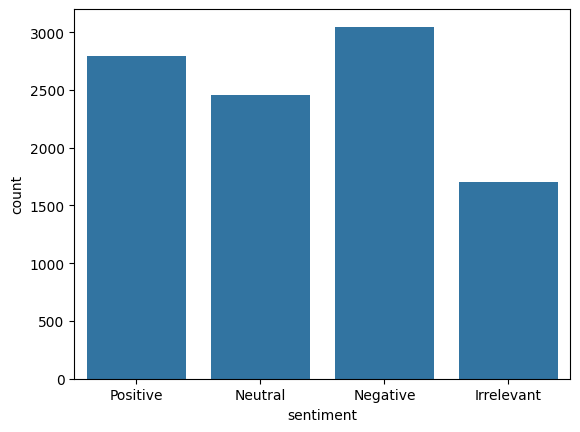

In [ ]:
import seaborn as sns
sns.countplot(data=df2, x='sentiment');

In [ ]:
df2['Tweet_content'] = df2['Tweet_content'].astype(str)
df2['tweet_length'] = df2['Tweet_content'].apply(lambda x: len(x))
df2.head()


,Tweet_ID,entity,sentiment,Tweet_content,tweet_length
3216,1759,CallOfDutyBlackopsColdWar,Positive,BLACK OPS COLD WAR ZOMBIES LOOKS FUCKING INSAN...,69
50688,6301,FIFA,Neutral,"Play Pro Clubs on Xbox, Playstation or PC? Dow...",277
46032,11901,Verizon,Negative,"Apparentally if you have verizon as your ISP, ...",68
56587,11310,TomClancysRainbowSix,Negative,@ Rainbow6Game I have not played for a while a...,187
42350,10066,PlayerUnknownsBattlegrounds(PUBG),Negative,"At the same time, despite the fact that there ...",258


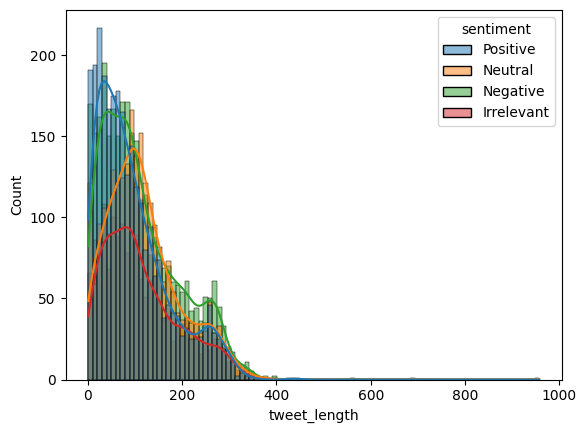

In [ ]:
sns.histplot(data=df2, x='tweet_length', hue='sentiment', kde=True);

In [ ]:
df2.isnull().sum()

,0
Tweet_ID,0
entity,0
sentiment,0
Tweet_content,0
tweet_length,0


In [ ]:
df2.duplicated().sum()

68

In [ ]:
for i in df.columns:
  print(i,"has",df2[i].nunique(),"unique values")

Tweet_ID has 7157 unique values
entity has 32 unique values
sentiment has 4 unique values
Tweet_content has 9636 unique values


In [ ]:
df2['entity'].unique()

array(['CallOfDutyBlackopsColdWar', 'FIFA', 'Verizon',
       'TomClancysRainbowSix', 'PlayerUnknownsBattlegrounds(PUBG)',
       'TomClancysGhostRecon', 'CS-GO', 'AssassinsCreed',
       'GrandTheftAuto(GTA)', 'NBA2K', 'Overwatch', 'HomeDepot',
       'ApexLegends', 'Xbox(Xseries)', 'Dota2', 'Borderlands',
       'Cyberpunk2077', 'PlayStation5(PS5)', 'LeagueOfLegends',
       'RedDeadRedemption(RDR)', 'WorldOfCraft', 'Nvidia', 'Google',
       'CallOfDuty', 'Fortnite', 'Facebook', 'Battlefield', 'Hearthstone',
       'johnson&johnson', 'Amazon', 'MaddenNFL', 'Microsoft'],
      dtype=object)

In [ ]:
df2['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [ ]:
df2.dtypes

,0
Tweet_ID,int64
entity,object
sentiment,object
Tweet_content,object
tweet_length,int64


### Dropping the null values

In [ ]:
df2 = df2.dropna(axis=0, how='any')

In [ ]:
df2.isnull().sum()

,0
Tweet_ID,0
entity,0
sentiment,0
Tweet_content,0
tweet_length,0


###  Dropping the duplicate values

In [ ]:
df2.duplicated().sum()

68

In [ ]:
df2.drop_duplicates(inplace=True)
df2.duplicated().sum()

## TEXT PRE-PROCESSING

### Lower Casing

In [ ]:
text= "HELLO My name IS AHMed AND You ?"
lower_text= text.lower()
lower_text

'hello my name is ahmed and you ?'

In [ ]:
df2["Tweet_content"] = df2["Tweet_content"].str.lower()
df2['Tweet_content'].head()

,Tweet_content
3216,black ops cold war zombies looks fucking insan...
50688,"play pro clubs on xbox, playstation or pc? dow..."
46032,"apparentally if you have verizon as your isp, ..."
56587,@ rainbow6game i have not played for a while a...
42350,"at the same time, despite the fact that there ..."


### Removal of HTML Tags

In [ ]:
 ## Remove html tags
import re
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'', text)


In [ ]:
text= "<head><title> This is </title></head><body><h1>how the text </h1><p>looks like </p><p>when removing HTML tags.</p>"
text =remove_html_tags(text)
text

' This is how the text looks like when removing HTML tags.'

In [ ]:
df2['Tweet_content']=df2['Tweet_content'].apply(remove_html_tags)
df2['Tweet_content'].head()

,Tweet_content
3216,black ops cold war zombies looks fucking insan...
50688,"play pro clubs on xbox, playstation or pc? dow..."
46032,"apparentally if you have verizon as your isp, ..."
56587,@ rainbow6game i have not played for a while a...
42350,"at the same time, despite the fact that there ..."


### Removal of URLs

In [ ]:
##remove url
def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'', text)

In [ ]:
text= "The official website of OpenAI is https://openai.com"
text=remove_url(text)
text

'The official website of OpenAI is '

In [ ]:
df2['Tweet_content']=df2['Tweet_content'].apply(remove_url)

### Removal of Punctuations ( !”#$%&’()*+,-./:;<=>?@[\]^_{|}~‘ )


In [ ]:
import string,time
string.punctuation
exclude = string.punctuation
def remove_punc(text):
  for char in exclude:
    text = text.replace(char,'')
  return text

In [ ]:
text= "@aasle[]ma~a!! lab;'e@s.s 3&l%%-^i{k c?h*#na)7we+lk"
remove_punc(text)

'aaslemaa labess 3lik chna7welk'

In [ ]:
df2['Tweet_content']=df2['Tweet_content'].apply(remove_punc)
df2['Tweet_content'].head()

,Tweet_content
3216,black ops cold war zombies looks fucking insan...
50688,play pro clubs on xbox playstation or pc downl...
46032,apparentally if you have verizon as your isp v...
56587,rainbow6game i have not played for a while an...
42350,at the same time despite the fact that there a...


### Chat Words Conversion

In [ ]:
chat_words = {
"AFAIK": "As Far As I Know",
"ASAP": "As Soon As Possible",
"ATK": "At The Keyboard",
"ATM": "At The Moment",
"A3": "Anytime, Anywhere, Anyplace",
"BAK": "Back At Keyboard",
"BBL": "Be Back Later",
"BBS": "Be Back Soon",
"BFN": "Bye For Now",
"B4N": "Bye For Now",
"BRB": "Be Right Back",
"BRT": "Be Right There",
"BTW": "By The Way",
"B4": "Before",
"CU": "See You",
"CUL8R": "See You Later",
"CYA": "See You",
"FAQ": "Frequently Asked Questions",
"FC": "Fingers Crossed",
"FWIW": "For What It's Worth",
"FYI": "For Your Information",
"GAL": "Get A Life",
"GG": "Good Game",
"GN": "Good Night",
"GMTA": "Great Minds Think Alike",
"GR8": "Great!",
"G9": "Genius",
"IC": "I See",
"ICQ": "I Seek you (also a chat program)",
"ILU": "I Love You",
"IMHO": "In My Honest/Humble Opinion",
"IMO": "In My Opinion",
"IOW": "In Other Words",
"IRL": "In Real Life",
"KISS": "Keep It Simple, Stupid",
"LDR": "Long Distance Relationship",
"LMAO": "Laugh My A** Off",
"LOL": "Laughing Out Loud",
"LTNS": "Long Time No See",
"L8R": "Later",
"MTE": "My Thoughts Exactly",
"M8": "Mate",
"NRN": "No Reply Necessary",
"OIC": "Oh I See",
"PITA": "Pain In The A**",
"PRT": "Party",
"PRW": "Parents Are Watching",
"QPSA?": "Que Pasa?",
"ROFL": "Rolling On The Floor Laughing",
"ROFLOL": "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO": "Rolling On The Floor Laughing My A** Off",
"SK8": "Skate",
"STATS": "Your sex and age",
"ASL": "Age, Sex, Location",
"THX": "Thank You",
"TTFN": "Ta-Ta For Now!",
"TTYL": "Talk To You Later",
"U": "You",
"U2": "You Too",
"U4E": "Yours For Ever",
"WB": "Welcome Back",
"WTF": "What The F***",
"WTG": "Way To Go!",
"WUF": "Where Are You From?",
"W8": "Wait...",
"7K": "Sick:-D Laughter",
"TFW": "That Feeling When",
"MFW": "My Face When",
"MRW": "My Reaction When",
"IFYP": "I Feel Your Pain",
"TNTL": "Trying Not To Laugh",
"JK": "Just Kidding",
"IDC": "I Don't Care",
"ILY": "I Love You",
"IMU": "I Miss You",
"ADIH": "Another Day In Hell",
"ZZZ": "Sleeping, Bored, Tired",
"WYWH": "Wish You Were Here",
"TIME": "Tears In My Eyes",
"BAE": "Before Anyone Else",
"FIMH": "Forever In My Heart",
"BSAAW": "Big Smile And A Wink",
"BWL": "Bursting With Laughter",
"BFF": "Best Friends Forever",
"CSL": "Can't Stop Laughing"
}

In [ ]:
def chat_conversion(text):
  new_text = []
  for w in text.split():
    if w.upper() in chat_words:
      new_text.append(chat_words[w.upper()])
    else:
      new_text.append(w)
  return " ".join(new_text)

In [ ]:
text="Hello i ll BRB , BTW did you see that hilarious meme? It made me ROFL"
text=chat_conversion(text)
text

'Hello i ll Be Right Back , By The Way did you see that hilarious meme? It made me Rolling On The Floor Laughing'

In [ ]:
df2['Tweet_content']=df2['Tweet_content'].apply(chat_conversion)

###  Removal of Emojis

In [ ]:
import re
def remove_emoji(text):
  emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F" # emoticons
    u"\U0001F300-\U0001F5FF" # symbols & pictographs
    u"\U0001F680-\U0001F6FF" # transport & map symbols
    u"\U0001F1E0-\U0001F1FF" # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)


In [ ]:
df2['Tweet_content']=df2['Tweet_content'].apply(remove_emoji)

###  Spelling Correction

In [ ]:
!pip install pyspellchecker -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 60.4 MB/s eta 0:00:00


In [ ]:
from textblob import TextBlob
def correct_spellings(text):
  textBlb = TextBlob(text)
  correct_text=textBlb.correct().string
  return correct_text


In [ ]:
from spellchecker import SpellChecker
spell = SpellChecker()
def correct_spelling(text):
  corrected_text = []
  misspelled_words = spell.unknown(text.split())
  for word in text.split():
    if word in misspelled_words:
      corrected_text.append(spell.correction(word))
    else:
      corrected_text.append(word)
  return " ".join(corrected_text)

In [ ]:
text = "whuut is yoiur namme "
correct_spellings(text)

'what is your name '

In [ ]:
df2['Tweet_content']=df2['Tweet_content'].apply(correct_spellings)

###  Removal of stopwords

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def remove_stopwords(text):
  new_text = []
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x = new_text[:]
  new_text.clear()
  return " ".join(x)


In [ ]:
text= "Their own cat walked through the park after it had rained , but it stopped under the tree"
remove_stopwords(text)

'Their  cat walked   park    rained ,   stopped   tree'

In [ ]:
df2['Tweet_content']=df2['Tweet_content'].apply(remove_stopwords)
df2['Tweet_content'].head()


,Tweet_content
3216,black ops cold war zombies looks fucking insan...
50688,play pro clubs xbox playstation pc download ...
46032,apparentally verizon isp valorant says fuck
56587,rainbow6game played tried get game ...
42350,Tears In My Eyes despite fact currently...


### Removal of Frequent words

In [ ]:
from collections import Counter
cnt = Counter()
for text in test_data["Tweet_content"].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common(15)

[('the', 540),
 ('to', 409),
 ('and', 372),
 ('a', 363),
 ('I', 321),
 ('of', 283),
 ('is', 269),
 ('for', 226),
 ('in', 199),
 ('this', 169),
 ('on', 168),
 ('you', 140),
 ('with', 140),
 ('my', 136),
 ('it', 133)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
  """custom function to remove the frequent words"""
  return " ".join([word for word in str(text).split() if word not in FREQWORDS])

In [ ]:
df2['Tweet_content'] = df2['Tweet_content'].apply(lambda text:remove_freqwords(text))
df2.head()

,Tweet_ID,entity,sentiment,Tweet_content,tweet_length
0,2401,Borderlands,Positive,im getting borderlands murder,53
1,2401,Borderlands,Positive,coming borders kill,51
2,2401,Borderlands,Positive,im getting borderlands kill,50
3,2401,Borderlands,Positive,im coming borderlands murder,51
4,2401,Borderlands,Positive,im getting borderlands 2 murder,57


###  Removal of Rare words

In [ ]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
  """custom function to remove the rare words"""
  return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df['Tweet_content'] = df['Tweet_content'].apply(lambda text: remove_rarewords(text))
df.head()

,Tweet_ID,entity,sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...


### removal of Emoticons

In [ ]:
EMOTICONS = {
u":‑\)":"Happy face or smiley",
u":\)":"Happy face or smiley",
u":-\]":"Happy face or smiley",
u":\]":"Happy face or smiley",
u":-3":"Happy face smiley",
u":3":"Happy face smiley",
u":->":"Happy face smiley",
u":>":"Happy face smiley",
u"8-\)":"Happy face smiley",
u":o\)":"Happy face smiley",
u":-\}":"Happy face smiley",
u":\}":"Happy face smiley",
u":-\)":"Happy face smiley",
u":c\)":"Happy face smiley",
u":\^\)":"Happy face smiley",
u"=\]":"Happy face smiley",
u"=\)":"Happy face smiley",
u":‑D":"Laughing, big grin or laugh with glasses",
u":D":"Laughing, big grin or laugh with glasses",
u"8‑D":"Laughing, big grin or laugh with glasses",
u"8D":"Laughing, big grin or laugh with glasses",
u"X‑D":"Laughing, big grin or laugh with glasses",
u"XD":"Laughing, big grin or laugh with glasses",
u"=D":"Laughing, big grin or laugh with glasses",
u"=3":"Laughing, big grin or laugh with glasses",
u"B\^D":"Laughing, big grin or laugh with glasses",
u":-\)\)":"Very happy",
u":‑\(":"Frown, sad, andry or pouting",
u":-\(":"Frown, sad, andry or pouting",
u":\(":"Frown, sad, andry or pouting",
u":‑c":"Frown, sad, andry or pouting",
u":c":"Frown, sad, andry or pouting",
u":‑<":"Frown, sad, andry or pouting",
u":<":"Frown, sad, andry or pouting",
u":‑\[":"Frown, sad, andry or pouting",
u":\[":"Frown, sad, andry or pouting",
u":-\|\|":"Frown, sad, andry or pouting",
u">:\[":"Frown, sad, andry or pouting",
u":\{":"Frown, sad, andry or pouting",
u":@":"Frown, sad, andry or pouting",
u">:\(":"Frown, sad, andry or pouting",
u":'‑\(":"Crying",
u":'\(":"Crying",
u":'‑\)":"Tears of happiness",
u":'\)":"Tears of happiness",
u"D‑':":"Horror",
u"D:<":"Disgust",
u"D:":"Sadness",
u"D8":"Great dismay",
u"D;":"Great dismay",
u"D=":"Great dismay",
u"DX":"Great dismay",
u":‑O":"Surprise",
u":O":"Surprise",
u":‑o":"Surprise",
u":o":"Surprise",
u":-0":"Shock",
u"8‑0":"Yawn",
u">:O":"Yawn",
u":-\*":"Kiss",
u":\*":"Kiss",
u":X":"Kiss",
u";‑\)":"Wink or smirk",
u";\)":"Wink or smirk",
u"\*-\)":"Wink or smirk",
u"\*\)":"Wink or smirk",
u";‑\]":"Wink or smirk",
u";\]":"Wink or smirk",
u";\^\)":"Wink or smirk",
u":‑,":"Wink or smirk",
u";D":"Wink or smirk",
u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
u":‑\|":"Straight face",
u":\|":"Straight face",
u":$":"Embarrassed or blushing",
u":‑x":"Sealed lips or wearing braces or tongue-tied",
u":‑#":"Sealed lips or wearing braces or tongue-tied",
u":#":"Sealed lips or wearing braces or tongue-tied",
u":‑&":"Sealed lips or wearing braces or tongue-tied",
u":&":"Sealed lips or wearing braces or tongue-tied",
u"O:‑\)":"Angel, saint or innocent",
u"O:\)":"Angel, saint or innocent",
u"0:‑3":"Angel, saint or innocent",
u"0:3":"Angel, saint or innocent",
u"0:‑\)":"Angel, saint or innocent",
u"0:\)":"Angel, saint or innocent",
u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u"0;\^\)":"Angel, saint or innocent",
u">:‑\)":"Evil or devilish",
u">:\)":"Evil or devilish",
u"\}:‑\)":"Evil or devilish",
u"\}:\)":"Evil or devilish",
u"3:‑\)":"Evil or devilish",
u"3:\)":"Evil or devilish",
u">;\)":"Evil or devilish",
u"\|;‑\)":"Cool",
u"\|‑O":"Bored",
u":‑J":"Tongue-in-cheek",
u"#‑\)":"Party all night",
u"%‑\)":"Drunk or confused",
u"%\)":"Drunk or confused",
u":-###..":"Being sick",
u":###..":"Being sick",
u"<:‑\|":"Dump",
u"\(>_<\)":"Troubled",
u"\(>_<\)>":"Troubled",
u"\(';'\)":"Baby",
u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
u"\('_'\)":"Sad or Crying",
u"\(/_;\)":"Sad or Crying",
u"\(T_T\) \(;_;\)":"Sad or Crying",
u"\(;_;":"Sad of Crying",
u"\(;_:\)":"Sad or Crying",
u"\(;O;\)":"Sad or Crying",
u"\(:_;\)":"Sad or Crying",
u"\(ToT\)":"Sad or Crying",
u";_;":"Sad or Crying",
u";-;":"Sad or Crying",
u";n;":"Sad or Crying",
u";;":"Sad or Crying",
u"Q\.Q":"Sad or Crying",
u"T\.T":"Sad or Crying",
u"QQ":"Sad or Crying",
u"Q_Q":"Sad or Crying",
u"\(-\.-\)":"Shame",
u"\(-_-\)":"Shame",
u"\(=_=\)":"Tired",
u"\(=\^\·\^=\)":"cat",
u"\(=\^\·\·\^=\)":"cat",
u"=_\^= ":"cat",
u"\(\.\.\)":"Looking down",
u"\(\._\.\)":"Looking down",
u"\^m\^":"Giggling with hand covering mouth",
u"\(ToT\)/~~~":"Waving",
u"\(\*\^0\^\*\)":"Excited",
u"\(\*_\*\)":"Amazed",
u"\(\*_\*;":"Amazed",
u"\(\+_\+\) \(@_@\)":"Amazed",
u"\(\*\^\^\)v":"Laughing,Cheerful",
u"\(\^_\^\)v":"Laughing,Cheerful",
u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
u'\(-"-\)':"Worried",
u"\(\^0_0\^\)":"Eyeglasses",
u"\(o\.o\)":"Surprised",
u"oO":"Surprised"
}

In [ ]:
def remove_emoticons(text):
  emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
  return emoticon_pattern.sub(r'', text)


In [ ]:
df['Tweet_content']=df['Tweet_content'].apply(remove_emoticons)

###  Conversion of Emoticon to Words

In [ ]:
def convert_emoticons(text):
  for emot in EMOTICONS:
    text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
  return text

In [ ]:
df2['Tweet_content']=df2['Tweet_content'].apply(convert_emoticons)

### Stemming
##### convert them to their root or base form by removing suffixes. for example : runner , running , ran all would be reduced to "run".
##### Simpler and faster than lemmatization so it could be less accurate sometimes convert words to stems which are not actual words.

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()
def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

sent= "I walk by the walking of the walks"
stem_words(sent)

'i walk by the walk of the walk'

In [ ]:
sent2='Stemming is a text preprocessing technique in NLP that reduces words to their root or base form by removing suffixes. Unlike lemmatization, which relies on linguistic rules, stemming uses heuristic methods to strip affixes. For example, "running," "runner," and "ran" might all be reduced to "run." Common algorithms include the Porter Stemmer, which applies a series of rules to iteratively strip suffixes, and the Snowball Stemmer, which is an improved version of the Porter Stemmer. While stemming is faster and simpler than lemmatization, it can be less accurate, sometimes producing stems that are not actual words.'
stem_words(sent2)

'stem is a text preprocess techniqu in nlp that reduc word to their root or base form by remov suffixes. unlik lemmatization, which reli on linguist rules, stem use heurist method to strip affixes. for example, "running," "runner," and "ran" might all be reduc to "run." common algorithm includ the porter stemmer, which appli a seri of rule to iter strip suffixes, and the snowbal stemmer, which is an improv version of the porter stemmer. while stem is faster and simpler than lemmatization, it can be less accurate, sometim produc stem that are not actual words.'

In [ ]:
df2['Tweet_content']=df2['Tweet_content'].apply(stem_words)

In [ ]:
#before stemming
df3["Tweet_content"].head()

,Tweet_content
19420,This is not a truly wonderful piece.. BBC News...
8908,I've already played exactly almost 2 games mor...
17911,"If someone wants to buy the PS5 for me, I don'..."
62390,I want to be gta v Fashion so bad
33891,@FortniteGame IG-YOU for putting Star Wars lig...


In [ ]:
#after stemming
df2['Tweet_content'].head()

,Tweet_content
19420,truly wonderful piece bbc news disabled s...
8908,ive already played exactly almost 2 games v...
17911,someone wants buy ps5 dont mind
62390,want gta v fashion bad
33891,fortnitegame igyou putting star wars lightsab...


### lemmatization

#### nltk

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

sent= "playing "
lemmatize_words(sent)

'playing'

#### spacy

In [ ]:
import spacy

lem = spacy.load('en_core_web_sm')
sent = "we are learning about natural language processing"
doc = lem(sent)
print("Original Word - Lemmatized Word")
for token in doc :
  print(f"{token.text} - {token.lemma_}")

Original Word - Lemmatized Word
we - we
are - be
learning - learn
about - about
natural - natural
language - language
processing - processing


In [ ]:
def lemmatize_text(text):
  lem = spacy.load('en_core_web_sm')
  doc = lem(text)
  return " ".join([token.lemma_ for token in doc])

sent= "we are learning about natural language processing"
lemmatize_text(sent)

'we be learn about natural language processing'

In [ ]:
df4= df2.copy()

In [ ]:
df2["text_lemmatized"] = df2["Tweet_content"].apply(lambda text:lemmatize_words(text))
df2["Tweet_content"].head()

,Tweet_content
3216,black ops cold war zombies looks fucking insan...
50688,play pro clubs xbox playstation pc download ...
46032,apparentally verizon isp valorant says fuck
56587,rainbow6game played tried get game ...
42350,Tears In My Eyes despite fact currently...


### Tokenization

#### using python split

In [ ]:
sentence = "This is an introduction to natural language processing"
tokens = sentence.split()
print(tokens)

['This', 'is', 'an', 'introduction', 'to', 'natural', 'language', 'processing']


In [ ]:
sentence = "This is, an introduction to natural language processing"
tokens = sentence.split(',')
tokens

['This is', ' an introduction to natural language processing']

#### using regular expression

In [ ]:
import re
sentence = "This is an introduction to NLP"

tokens= re.findall("[\w']+",sentence)
tokens

['This', 'is', 'an', 'introduction', 'to', 'NLP']

#### using NLTK

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
sentence = "Today, we re going to learn about This NLP!"
from nltk.tokenize import word_tokenize , sent_tokenize
word_tokenize(sentence)

['Today', ',', 'we', 're', 'going', 'to', 'learn', 'about', 'This', 'NLP', '!']

In [ ]:
sentence= "if you need help, mail me at omar@gmail.com"
word_tokenize(sentence)

['if',
 'you',
 'need',
 'help',
 ',',
 'mail',
 'me',
 'at',
 'omar',
 '@',
 'gmail.com']

In [ ]:
def tokenize_and_join(text):
    tokens = word_tokenize(text)
    return ",".join(tokens)
df2["text_tokenized"] = df2["text_lemmatized"].apply(lambda text:tokenize_and_join(text))
df2["text_tokenized"].head()

,text_tokenized
3216,"black,ops,cold,war,zombie,look,fucking,insane,..."
50688,"play,pro,club,xbox,playstation,pc,download,dis..."
46032,"apparentally,verizon,isp,valorant,say,fuck"
56587,"rainbow6game,played,tried,get,game,got,error,6..."
42350,"Tears,In,My,Eyes,despite,fact,currently,100,mi..."


#### using spacy

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [ ]:
sentence = "Today, we re going to learn about This NLP!"
doc = nlp(sentence)
[token.text for token in doc]

['Today', ',', 'we', 're', 'going', 'to', 'learn', 'about', 'This', 'NLP', '!']

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
df2["text_tokenized"] = df2["Tweet_content"].apply(lambda text:word_tokenize(text))


In [ ]:
df2["text_tokenized"].head()

,text_tokenized
19420,"[truly, wonderful, piece, bbc, news, disabled,..."
8908,"[ive, already, played, exactly, almost, 2, gam..."
17911,"[someone, wants, buy, ps5, dont, mind]"
62390,"[want, gta, v, fashion, bad]"
33891,"[fortnitegame, igyou, putting, star, wars, lig..."


In [ ]:
df2.head()

,Tweet_ID,entity,sentiment,Tweet_content,tweet_length,text_lemmatized,text_tokenized
3216,1759,CallOfDutyBlackopsColdWar,Positive,black ops cold war zombies looks fucking insan...,69,black ops cold war zombie look fucking insane ...,"black,ops,cold,war,zombie,look,fucking,insane,..."
50688,6301,FIFA,Neutral,play pro clubs xbox playstation pc download ...,277,play pro club xbox playstation pc download dis...,"play,pro,club,xbox,playstation,pc,download,dis..."
46032,11901,Verizon,Negative,apparentally verizon isp valorant says fuck,68,apparentally verizon isp valorant say fuck,"apparentally,verizon,isp,valorant,say,fuck"
56587,11310,TomClancysRainbowSix,Negative,rainbow6game played tried get game ...,187,rainbow6game played tried get game got error 6...,"rainbow6game,played,tried,get,game,got,error,6..."
42350,10066,PlayerUnknownsBattlegrounds(PUBG),Negative,Tears In My Eyes despite fact currently...,258,Tears In My Eyes despite fact currently 100 mi...,"Tears,In,My,Eyes,despite,fact,currently,100,mi..."


In [ ]:
df2.to_csv("df_new.csv")

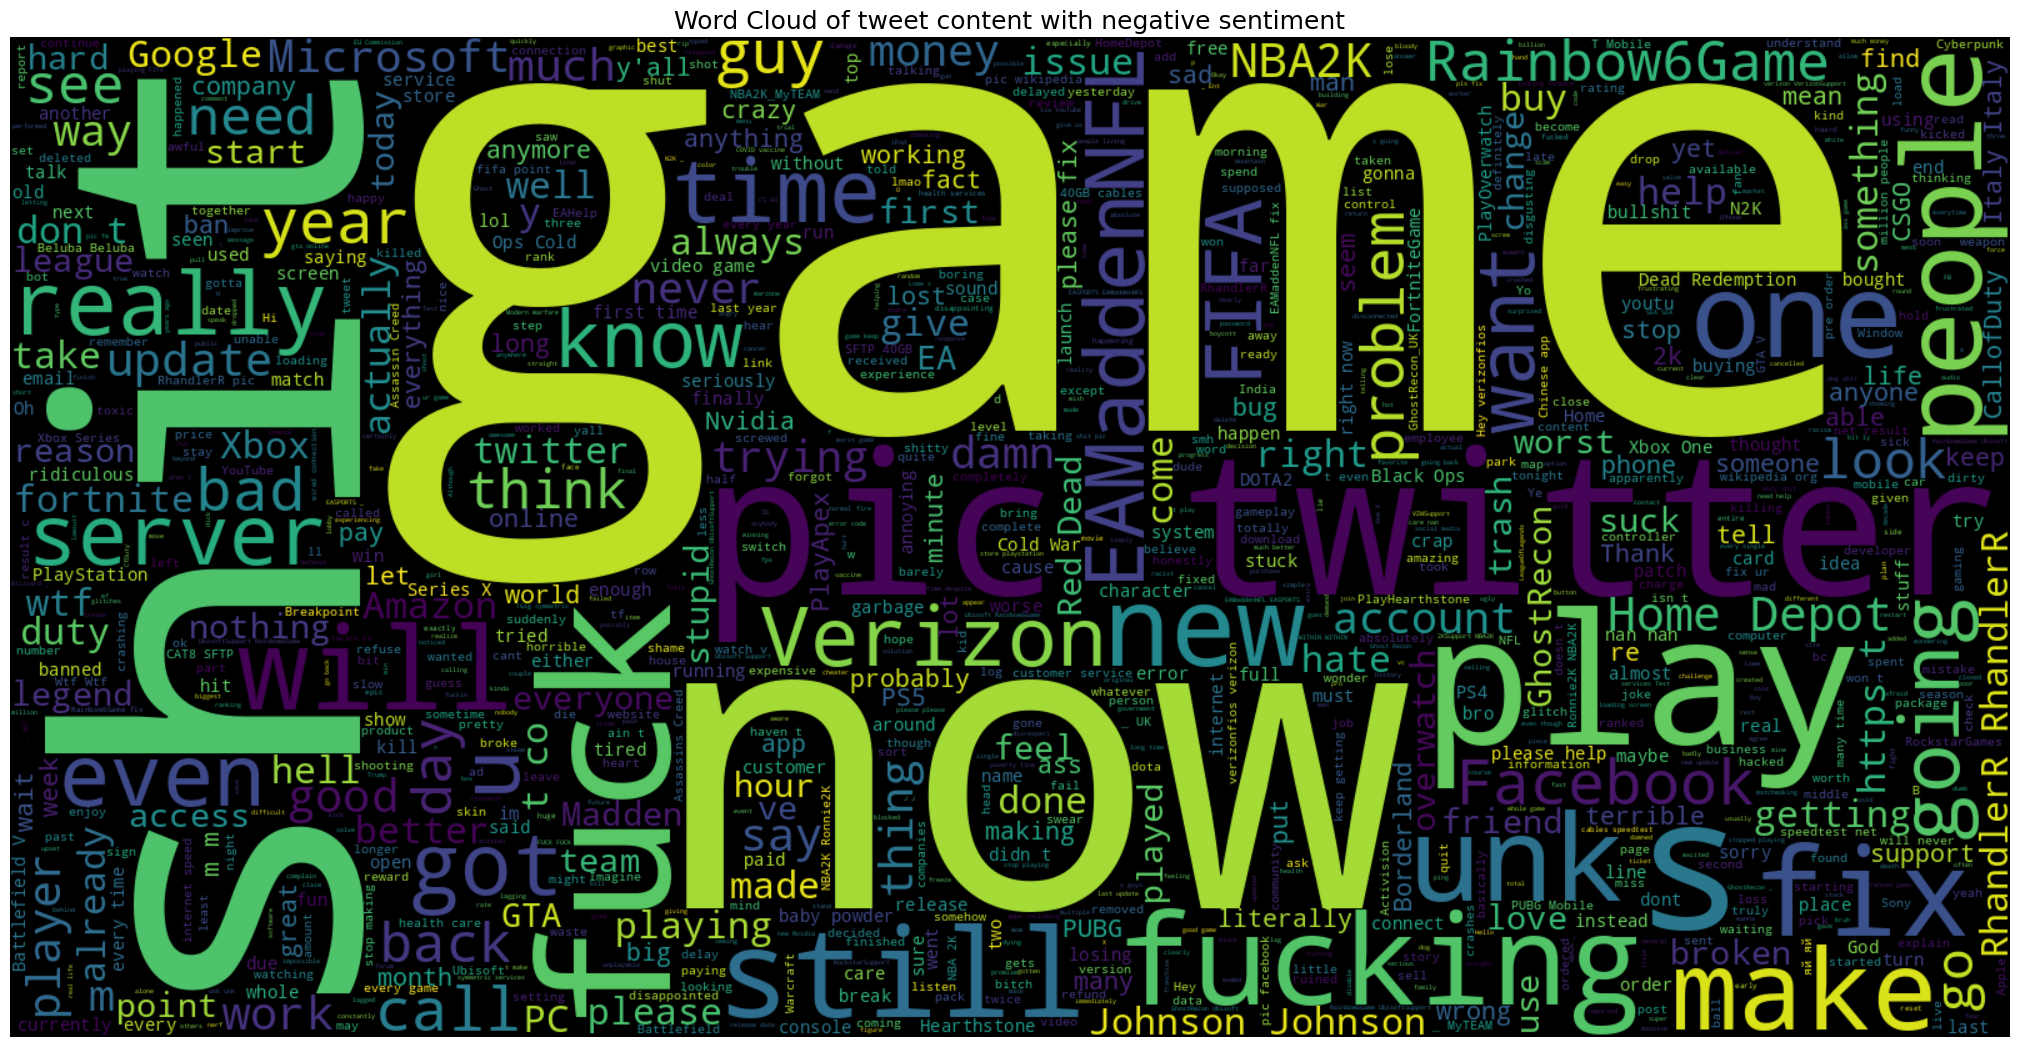

In [ ]:
train_data['Tweet_content'] = train_data['Tweet_content'].astype(str)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(train_data[train_data['sentiment'] == "Negative"].Tweet_content))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud of tweet content with negative sentiment', size=18);

In [ ]:
train_data['Tweet_content'] = train_data['Tweet_content'].astype(str)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(train_data[train_data['sentiment'] == "Positive"].Tweet_content))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud of tweet content with positive sentiment', size=18);

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = df2['sentiment']
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
y

array([3, 2, 1, ..., 1, 0, 1])

### model

In [ ]:
df2.head()
1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0

,Tweet_ID,entity,sentiment,Tweet_content,tweet_length,text_lemmatized,text_tokenized
3216,1759,CallOfDutyBlackopsColdWar,Positive,black ops cold war zombies looks fucking insan...,69,black ops cold war zombie look fucking insane ...,"black,ops,cold,war,zombie,look,fucking,insane,..."
50688,6301,FIFA,Neutral,play pro clubs xbox playstation pc download ...,277,play pro club xbox playstation pc download dis...,"play,pro,club,xbox,playstation,pc,download,dis..."
46032,11901,Verizon,Negative,apparentally verizon isp valorant says fuck,68,apparentally verizon isp valorant say fuck,"apparentally,verizon,isp,valorant,say,fuck"
56587,11310,TomClancysRainbowSix,Negative,rainbow6game played tried get game ...,187,rainbow6game played tried get game got error 6...,"rainbow6game,played,tried,get,game,got,error,6..."
42350,10066,PlayerUnknownsBattlegrounds(PUBG),Negative,Tears In My Eyes despite fact currently...,258,Tears In My Eyes despite fact currently 100 mi...,"Tears,In,My,Eyes,despite,fact,currently,100,mi..."


In [ ]:
X= df2[['text_tokenized']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = df2['sentiment']
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train.shape

(7945, 2)

In [ ]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train['text_tokenized']).toarray()
X_test_bow = cv.transform(X_test['text_tokenized']).toarray()

X_train_bow.shape

(7945, 14418)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_bow, y_train)
y_pred = lr.predict(X_test_bow)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.61852038248616


#### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.6134876698540513

In [ ]:
# predict
import re
import string
from nltk.stem.porter import PorterStemmer
def lemmatize_text(text):
  lem = spacy.load('en_core_web_sm')
  doc = lem(text)
  return " ".join([token.lemma_ for token in doc])

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = lemmatize_text(text) #lemm
    text = remove_stopwords(text)
    return text

new_sentence = "i am going to kill you !"
processed_sentence = preprocess_text(new_sentence)
processed_sentence

'I  go  kill '

In [ ]:
sentence_vector = cv.transform([processed_sentence]).toarray()
sentence_vector

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
predicted_sentiment = lr.predict(sentence_vector)
predicted_sentiment

array([2])

In [ ]:
sentiment_labels = encoder.classes_
predicted_sentiment_label = sentiment_labels[predicted_sentiment][0]
print(f"Predicted sentiment: {predicted_sentiment_label}")

Predicted sentiment: Neutral


#### TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train['Tweet_content']).toarray()
X_test_tfidf = tfidf.transform(X_test['Tweet_content'])

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)

accuracy_score(y_test,y_pred)

0.9205